In [5]:
# (9) Grabcut による大根領域の抜き出し
def mkGCmask(img,thickness=5):
    # カラー画像の場合はまずグレー画像に変換
    if img.ndim == 3:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy() # 副作用はないと思うが、念のため

    # 大きめのガウシアンフィルタでぼかした後に大津の方法で２階調化
    ksize = calcksize(gray) # RDForm で使う平滑化のカーネルサイズ
    bsize = ksize # 
    blur = cv2.GaussianBlur(gray,(bsize,bsize),0)  # ガウスぼかし                        
    coreimg = getMajorWhiteArea(blur,order) # ２値化して一番大きな領域だけ抽出
    
    # 膨張処理で確実に背景である領域をマスク
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize)) # 円形カーネル
    mask1 = 255-cv2.dilate(coreimg,kernel,iterations = ksize+5)
    
    # 収縮処理で確実に内部である領域をマスク
    mask2 = cv2.erode(coreimg,kernel,iterations = ksize+5)

    return mask1,mask2

In [6]:
import cv2
import rdlib4 as rd

In [7]:
imgs = rd.collectimages('RDSamples')
img = imgs[0]

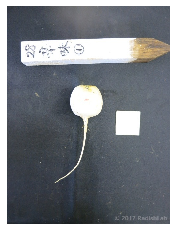

In [8]:
rd.plotimg(img)